# **Computer Infrastructure Assesment Tasks**

In [22]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


## **Task 1: Create Directory Structure**

In GitHub Codespaces using the terminal command line:

1. Navigate to the root of the repository:
    ```bash
    cd /workspaces/computer-infrastructure-assessment
    ```

2. Create a `data` directory with two subdirectories: `timestamps` and `weather`:
    ```bash
    mkdir -p data/timestamps data/weather
    ```

3. Verify the directory structure:
    ```bash
    tree data
    ```

- [Reference: Tree command in Linux with examples](https://www.geeksforgeeks.org/tree-command-unixlinux/)

## **Task 2: Timestamps**

1. Navigate to the `data/timestamps` directory:
    ```bash
    cd data/timestamps
    ```

2. Use the `date` command to output the current date and time to a text file named `now.txt`:
    ```bash
    date >> now.txt
    ```


3. Repeat this 10 times by creating a `for` loop that appends each timestamp to the file:
    ```bash
    for i in {1..10}; do date >> now.txt; done
    ```

    > **Note**: This loop runs the `date` command 10 times and appends the output to `now.txt` without overwriting previous entries.

4. Verify the contents of `now.txt`:
    ```bash
    cat now.txt
    ```

    ```
---

### References:
- [Date Command in Linux](https://www.geeksforgeeks.org/date-command-linux-examples/)
- [Writing Current Date/Time to a File](https://stackoverflow.com/questions/43221469/write-current-date-time-to-a-file-using-shell-script)


## **Task 3: Formatting Timestamps**

1. From Task 2, we are still in the `data/timestamps` directory.

2. Use the `date` command with the desired format to print the current date and time:
    ```bash
    date +"%Y%m%d_%H%M%S"
    ```


3. Use the command from step 2 with the `>>` operator to append the output into a file named `formatted.txt`:
    ```bash
    date +"%Y%m%d_%H%M%S" >> formatted.txt
    ```

4. Verify the contents of `formatted.txt`:
    ```bash
    cat formatted.txt
    ```

---

### References:
- [Date Formatting in Linux](https://phoenixnap.com/kb/linux-date-command)



## **Task 4: Create Timestamped Files**

1. Ensure you are in the `data/timestamps` directory from Task 3.

2. Use the `touch` command combined with the `date` command to create an empty file named with the current date and timestamp in the format `YYYYmmdd_HHMMSS`:
    ```bash
    touch $(date +%Y%m%d_%H%M%S).txt
    ```

3. Verify that the file was successfully created:
    ```bash
    ls
    ```

---

### References:
- [How to Create a File with Today's Date in the Filename](https://stackoverflow.com/questions/48270960/how-to-create-a-file-with-todays-date-in-the-filename)


## **Task 5: Download Today's Weather Data**

1. Navigate to the `weather` directory:
    ```bash
    cd data/weather
    ```

2. Use the `wget` command to download the weather data file from the provided URL. Use the `-O` option to specify the file name (`weather.json`):
    ```bash
    wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
    ```

3. Verify that the file has been created:
    ```bash
    ls
    ```

4. Confirm the contents of the file:
    ```bash
    file weather.json
    cat weather.json
    ```
---

### References:
- [Use wget to Download and Name File](https://stackoverflow.com/questions/16678487/how-to-change-filename-of-a-file-downloaded-with-wget)


## **Task 6: Download Weather Data with Timestamped File Name**

1. From Task 5, we are still in the `data/weather` directory.

2. Modify the command from Task 5 to name the JSON file with today’s date and timestamp:
    ```bash
    wget -O $(date +%Y%m%d_%H%M%S).json https://prodapi.metweb.ie/observations/athenry/today
    ```

3. Verify that the file has been created:
    ```bash
    ls
    ```

---

## **Task 7: Write the Script**

1. Navigate to the root of the repository:
    ```bash
    cd /workspaces/computer-infrastructure-assessment
    ```

2. Use `nano` to create the script:
    ```bash
    nano weather.sh
    ```

3. In the `nano` editor, write the following code to create the script:

    ```bash
    #!/bin/bash

    # Create the `data/weather` directory if it does not exist
    mkdir -p data/weather

    # Download the weather data with a timestamped file name
    wget -O data/weather/$(date +%Y%m%d_%H%M%S).json https://prodapi.metweb.ie/observations/athenry/today

    # Print a confirmation message
    echo "Downloaded weather data."
    ```

4. Save and exit `nano`, then grant execute permissions to the script by running:
    ```bash
    chmod u+x weather.sh
    ```

5. Run the script:
    ```bash
    ./weather.sh
    ```

6. Verify the script has created the file:
    ```bash
    ls data/weather
    ```
---

### References:
- [Create Shell Script in Nano](https://www.linuxandubuntu.com/home/how-to-create-shell-scripts/)
- [How to Make Script Executable in Linux](https://opensource.com/article/19/8/what-chmod-command)
- [How to Execute a Shell Script in Linux](https://www.cyberciti.biz/faq/how-to-execute-a-shell-script-in-linux/)


----

## **Task 9: Data Analysis with Pandas**

#### **1. Import Weather Data**

In [23]:
# Load the JSON file into a DataFrame
df = pd.read_json('data/weather/20241031_213107.json')

- [Reference:How to Read JSON Files with Pandas?](https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/)<br/>

#### **2. Data Cleaning and Preparation**

In [24]:
# Display the first few rows of the DataFrame
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,11,15n,Fog / Mist,"""Mist""",9,-,SW,225,97,0.0,1028,Thursday,2024-10-31,00:00
1,Athenry,11,15n,Fog / Mist,"""Mist""",9,-,S,180,98,0.1,1028,Thursday,2024-10-31,01:00
2,Athenry,11,15n,Fog / Mist,"""Mist""",9,-,S,180,97,0.0,1028,Thursday,2024-10-31,02:00
3,Athenry,10,15n,Fog / Mist,"""Mist""",11,-,S,180,97,0.0,1027,Thursday,2024-10-31,03:00
4,Athenry,10,15n,Fog / Mist,"""Mist""",13,-,SW,225,98,0.1,1027,Thursday,2024-10-31,04:00


##### **Handling Missing and Placeholder Values**

In [25]:
# Enable future behavior for downcasting as the 'replace' downcasting behavior is deprecated
pd.set_option('future.no_silent_downcasting', True)

# Replace blank or whitespace-only fields and '-' with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Handle blank or whitespace-only fields
df.replace('-', np.nan, inplace=True)  # Replace '-' values with NaN

- [Reference: Replace values in Pandas dataframe using regex](https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/)
- [Reference: Pandas: How to Replace Zero with NaN](https://www.statology.org/pandas-replace-0-with-nan/)
- [Reference: A Guide to R Regular Expressions](https://www.datacamp.com/tutorial/regex-r-regular-expressions-guide) 
- [Reference: Display rows with one or more NaN values in pandas dataframe](https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe)
- [Reference: pd.NA vs np.nan for pandas](https://stackoverflow.com/questions/60115806/pd-na-vs-np-nan-for-pandas)
- [Reference: How to solve pandas (2.2.0) "FutureWarning: Downcasting behavior in replace is deprecated".](https://github.com/pandas-dev/pandas/issues/57734)

##### **Summary of Missing Data**

In [26]:
# Count the total number of rows and missing values in each column
total_rows = len(df)
missing_data = df.isnull().sum()

# Print the total number of rows and the columns with missing values
print(f"Total number of rows: {total_rows}")
print("Columns with missing values:")
print(missing_data[missing_data > 0])

Total number of rows: 22
Columns with missing values:
windGust    22
dtype: int64


- [Reference: Using isnull() and groupby() on a pandas dataframe](https://stackoverflow.com/questions/46106954/using-isnull-and-groupby-on-a-pandas-dataframe)

##### **Summary Statistics**

This provides a statistical overview of key numerical columns.

In [27]:
# Generate and display summary statistics for numerical columns in the DataFrame
df.describe()

,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22
mean,10.545455,10.090909,214.772727,97.045455,0.063636,1026.409091,2024-10-31 00:00:00
min,10.000000,7.000000,180.000000,94.000000,0.000000,1024.000000,2024-10-31 00:00:00
25%,10.000000,9.000000,225.000000,97.000000,0.000000,1025.250000,2024-10-31 00:00:00
50%,10.000000,11.000000,225.000000,97.000000,0.100000,1027.000000,2024-10-31 00:00:00
75%,11.000000,11.000000,225.000000,98.000000,0.100000,1027.000000,2024-10-31 00:00:00
max,12.000000,13.000000,225.000000,99.000000,0.200000,1028.000000,2024-10-31 00:00:00
std,0.670982,1.715728,19.301941,1.252703,0.065795,1.140555,NaN


#### **3. Data Analysis**  
##### **Weather Description Analysis**  


In [28]:
# Count the frequency of each unique value in the 'weatherDescription' column
description_counts = df['weatherDescription'].value_counts()

# Print the frequency of each weather description
print(description_counts)

weatherDescription
Fog / Mist      15
Cloudy           3
Rain showers     2
Light rain       2
Name: count, dtype: int64


- [Reference:Pandas Index.value_counts()](https://www.geeksforgeeks.org/python-pandas-index-value_counts/)

##### **Weather Description Trend Visualisation**  

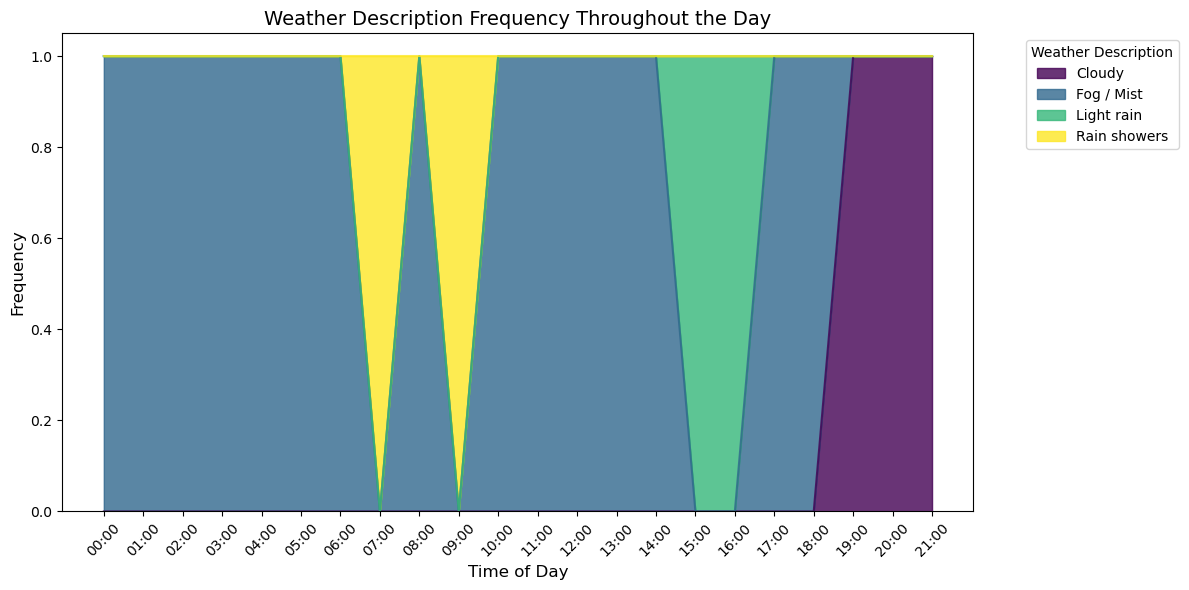

In [29]:
# Group the data by 'reportTime' and 'weatherDescription', counting occurrences
weather_counts = df.groupby(['reportTime', 'weatherDescription']).size().unstack(fill_value=0)

# Plot the grouped data as a stacked area chart
weather_counts.plot.area(stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.8)

# Add titles, labels, and format x-axis for readability
plt.title("Weather Description Frequency Throughout the Day", fontsize=14)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(
    ticks=range(len(weather_counts.index)),
    labels=weather_counts.index,
    rotation=45,
    fontsize=10
)

# Add a legend and adjust layout
plt.legend(title="Weather Description", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

##### **Key Observations:**  

Fog or mist dominated the day, with occasional clouds or light precipitation.


- [Reference: Pandas – Groupby value counts on the DataFrame](https://www.geeksforgeeks.org/pandas-groupby-value-counts-on-the-dataframe/)
- [Reference: How to Plot a Pandas DataFrame with Matplotlib [Area Plot]](https://www.geeksforgeeks.org/pandas-groupby-value-counts-on-the-dataframe/)
- [Reference: How to Customize Matplotlib Xticks Frequency: A Comprehensive Guide](https://how2matplotlib.com/matplotlib-xticks-frequency.html)
- [Reference: Pandas DataFrame index Property](https://www.w3schools.com/python/pandas/ref_df_index.asp#:~:text=The%20index%20property%20returns%20the,%2C%20stop%2C%20and%20step%20values.)
- [Reference: How to use range(len()) in Python?](https://blog.finxter.com/how-to-use-rangelen-in-python/)

#### **4. Temperature and Wind Speed Trends**  
##### Wind Speed Analysis  


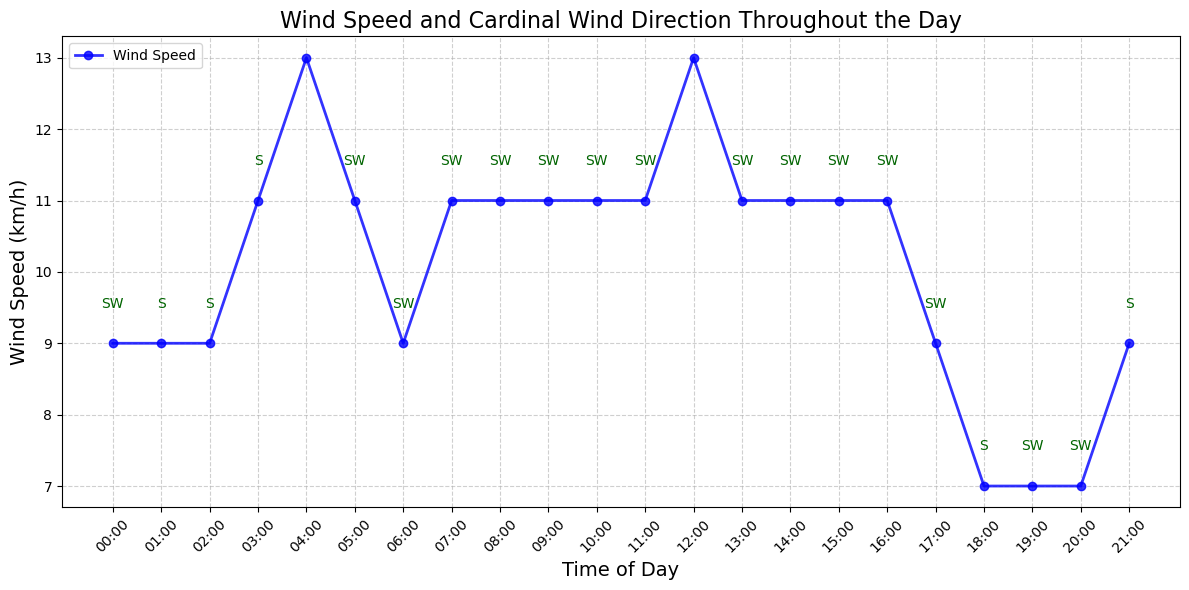

In [30]:
# Create a line plot for wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(df["reportTime"], df["windSpeed"], marker="o", linestyle="-", linewidth=2, alpha=0.8, color='blue', label="Wind Speed")
plt.title("Wind Speed and Cardinal Wind Direction Throughout the Day", fontsize=16)
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Wind Speed (km/h)", fontsize=14)

# Add titles and axis labels
plt.title("Wind Speed and Cardinal Wind Direction Throughout the Day", fontsize=16)
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Wind Speed (km/h)", fontsize=14)

# Add gridlines and format axis ticks
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Annotate the plot with cardinal wind directions
for time, speed, direction in zip(df["reportTime"], df["windSpeed"], df["cardinalWindDirection"]):
    plt.annotate(direction, (time, speed + 0.5), fontsize=10, ha='center', color='darkgreen')

# Add a legend and adjust layout
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

- [Reference: How to label points in a scatter plot using zip and annotate](https://stackoverflow.com/questions/67320773/how-to-label-points-in-a-scatter-plot-using-zip-and-annotate)
- [Reference: Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html#annotating-plots)
- [Reference: Line Plots in MatplotLib with Python](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python)

##### Temperature Analysis

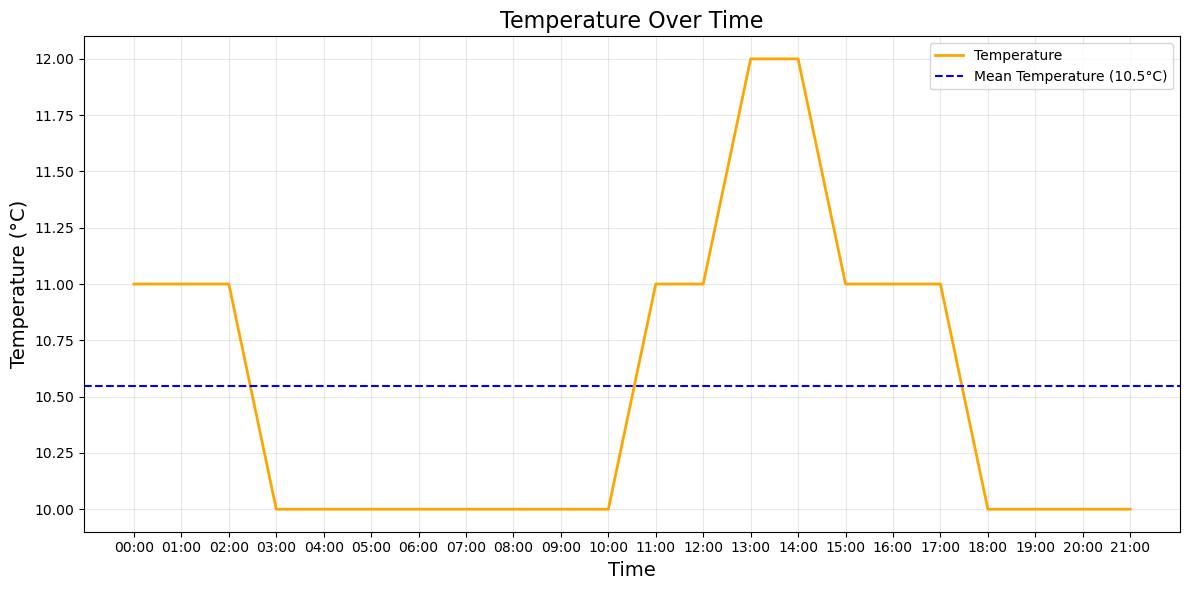

In [31]:
# Create a line plot for temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df["reportTime"], df["temperature"], label="Temperature", color="orange", linewidth=2)

# Add a horizontal line to indicate the mean temperature
mean_temp = df["temperature"].mean()
plt.axhline(mean_temp, color="blue", linestyle="--", label=f"Mean Temperature ({mean_temp:.1f}°C)")

# Add titles, axis labels, and a legend
plt.title("Temperature Over Time", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend()

# Add a grid and adjust layout
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()

- [Reference: Line Plots in MatplotLib with Python](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python)
- [Reference: Comprehensive Guide to Using axhline in Matplotlib](https://how2matplotlib.com/axhline.html)

#### **5. Data Cleaning Findings**  
##### Dataset Overview  
- **Rows and Columns:** 22 rows and 15 columns.  
- **Missing Data:** `windGust` column is entirely missing.
All other columns are complete.


#### **6. Key Observations**  
##### Key Columns
| Column Name              | Description                                   |
|--------------------------|-----------------------------------------------|
| Name                    | Station name (Athenry).                       |
| Dry Bulb Temperature    | Temperature in whole degrees Celsius.         |
| Weather Description     | Text description of the weather conditions.   |
| Wind Speed              | Wind speed in knots (kt).                     |
| Cardinal Wind Direction | Wind direction in cardinal form.              |
| Relative Humidity       | Humidity as a percentage.                     |
| Rainfall                | Precipitation amount in millimeters (mm).     |
| Pressure                | Mean sea level pressure in millibars (mbar).  |
| Day Name                | The day of the week for the observation.      |
| Date                    | Date of the observation.                      |
| Time of Observation     | Local time when the observation was recorded. |

##### Weather Trends  
- A cool, humid day with frequent fog or mist.  
- Predominantly south-southwest winds.  
- Very light and intermittent precipitation.  

##### **Temperature and Wind Analysis**  
- Steady temperature throughout the day, averaging around 10.5°C.  
- Consistent wind speeds with directional variations annotated.  

#### **7. Potential Future Analysis**  
- **Day-to-Day Trends:** Examine changes in temperature, humidity, and rainfall across multiple days.  
- **Correlations:** Explore relationships between wind speed, humidity, and weather descriptions.  
- **Seasonal Patterns:** Analyze trends over a longer timeframe to understand seasonal effects.  
<br/>

- [Reference: Description of metrics from Met Eireann](https://data.gov.ie/dataset/todays-weather-athenry/resource/fffca98d-f3b6-47de-a834-837f0633e14b)


___
